# First attempt: adjust the snowy/glaciated area of each input DEM for the melt that occured before or after lidar collection
* Idea: by modifying the input stereo DEM we could get a closer match to what the satellite would have captured if EXACTLY at the same time as the lidar collections

In [1]:
import rioxarray
import os
import glob
import matplotlib.pyplot as plt
import re

In [2]:
import cv2 as cv
import numpy as np

In [52]:
train_dirs[0]

'/mnt/1.0_TB_VOLUME/sethv/shashank_data/TRAIN_tile_stack_baker_small_errors_only/pc_laz_prep_full_outputs_USGS_LPC_WA_MtBaker_2015_10UEU8699_LAS_2017/lower_easton3/files_to_zip/'

In [55]:
subtracted = rioxarray.open_rasterio("/mnt/1.0_TB_VOLUME/sethv/shashank_data/TRAIN_tile_stack_baker_small_errors_only/pc_laz_prep_full_outputs_USGS_LPC_WA_MtBaker_2015_10UEU8699_LAS_2017/lower_easton3/files_to_zip/WV01_20150911_1020010042D39D00_1020010043455300_aligned_crop_1.0m-DEM_holes_filled_snow_median_subtracted.tif")
subtracted.shape


(1, 1000, 1000)

In [62]:
!ls -l "/mnt/1.0_TB_VOLUME/sethv/shashank_data/TRAIN_tile_stack_baker_small_errors_only/pc_laz_prep_full_outputs_USGS_LPC_WA_MtBaker_2015_10UEV8500_LAS_2017/lower_easton3/files_to_zip/WV01_20150911_1020010042D39D00_1020010043455300_aligned_crop_1.0m-DEM_holes_filled_snow_median_subtracted.tif"

-rw-rw-r-- 1 sethv sethv 8006360 Apr 24 17:01 /mnt/1.0_TB_VOLUME/sethv/shashank_data/TRAIN_tile_stack_baker_small_errors_only/pc_laz_prep_full_outputs_USGS_LPC_WA_MtBaker_2015_10UEV8500_LAS_2017/lower_easton3/files_to_zip/WV01_20150911_1020010042D39D00_1020010043455300_aligned_crop_1.0m-DEM_holes_filled_snow_median_subtracted.tif


In [64]:
rioxarray.open_rasterio("/mnt/1.0_TB_VOLUME/sethv/shashank_data/TRAIN_tile_stack_baker_small_errors_only/pc_laz_prep_full_outputs_USGS_LPC_WA_MtBaker_2015_10UEV8500_LAS_2017/lower_easton3/files_to_zip/WV01_20150911_1020010042D39D00_1020010043455300_aligned_crop_1.0m-DEM_holes_filled_snow_median_subtracted.tif").median()

<xarray.DataArray ()>
array(2091.45166016)
Coordinates:
    spatial_ref  int64 0

In [70]:
!ls -l  /mnt/1.0_TB_VOLUME/sethv/shashank_data/TRAIN_tile_stack_baker_small_errors_only/pc_laz_prep_full_outputs_USGS_LPC_WA_MtBaker_2015_10UEV8500_LAS_2017/lower_easton3/files_to_zip/WV01_20150911_1020010042D39D00_1020010043455300_aligned_crop_1.0m-DEM_holes_filled_snow_median_subtracted.tif                                                                                           



-rw-rw-r-- 1 sethv sethv 8006360 Apr 24 17:22 /mnt/1.0_TB_VOLUME/sethv/shashank_data/TRAIN_tile_stack_baker_small_errors_only/pc_laz_prep_full_outputs_USGS_LPC_WA_MtBaker_2015_10UEV8500_LAS_2017/lower_easton3/files_to_zip/WV01_20150911_1020010042D39D00_1020010043455300_aligned_crop_1.0m-DEM_holes_filled_snow_median_subtracted.tif


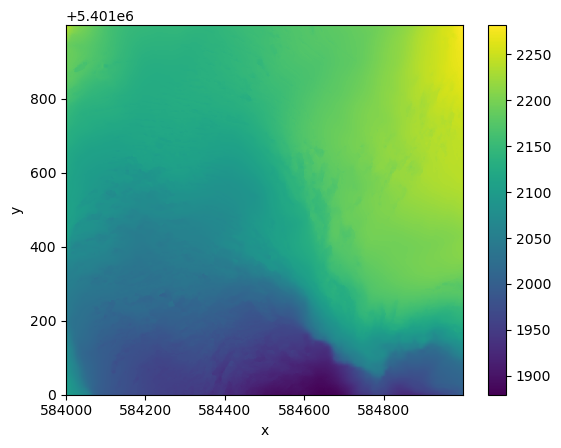

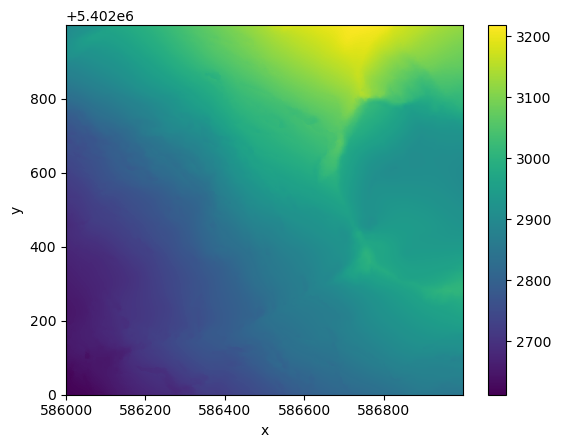

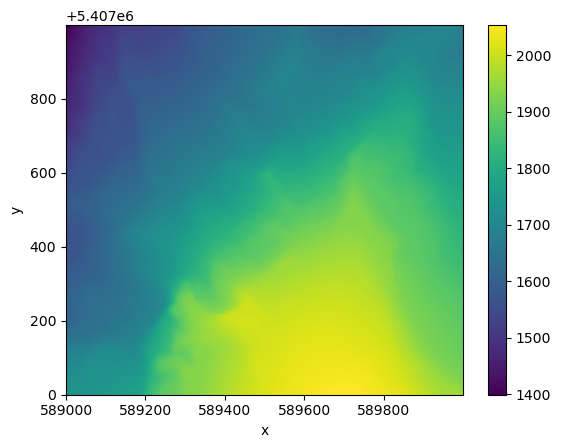

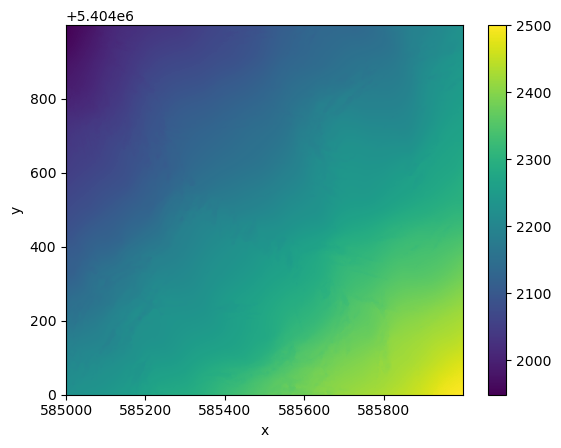

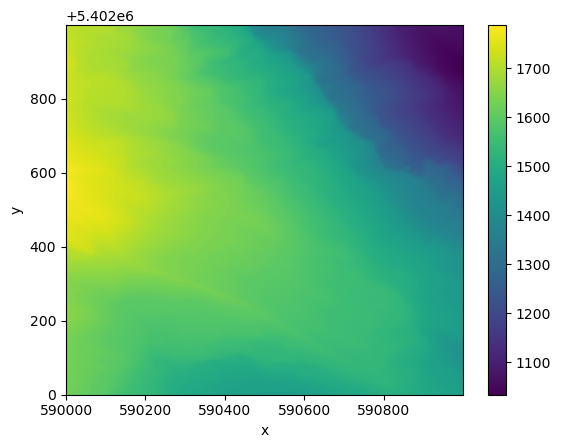

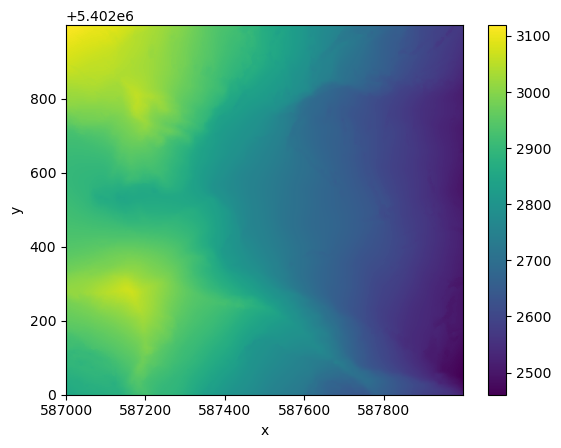

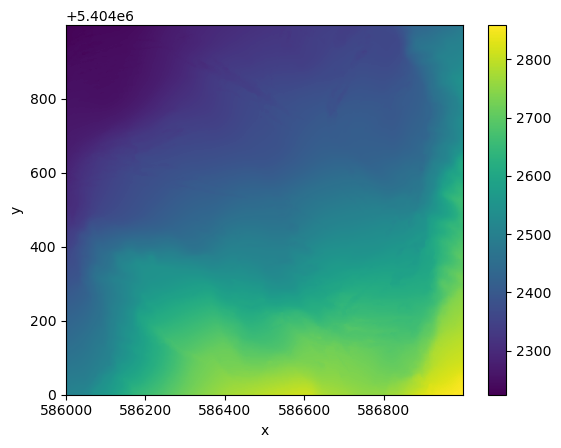

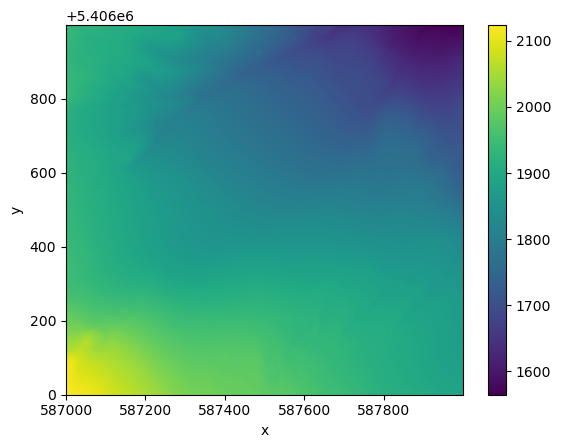

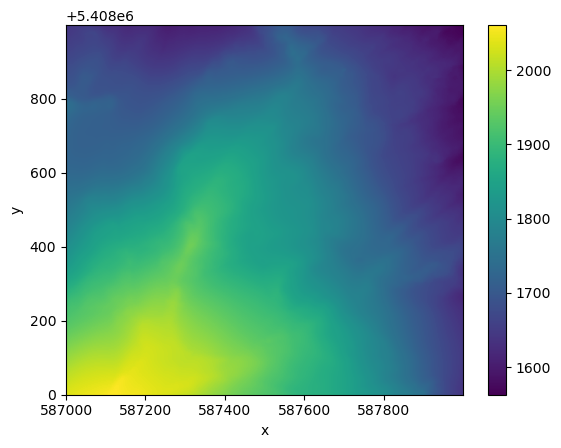

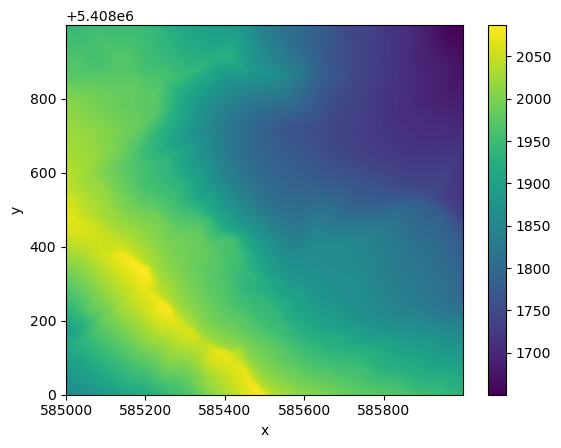

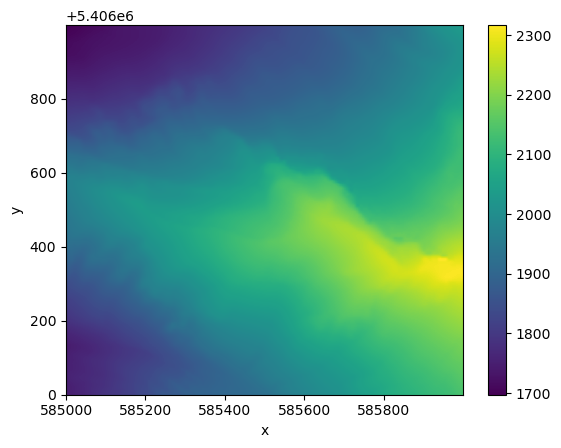

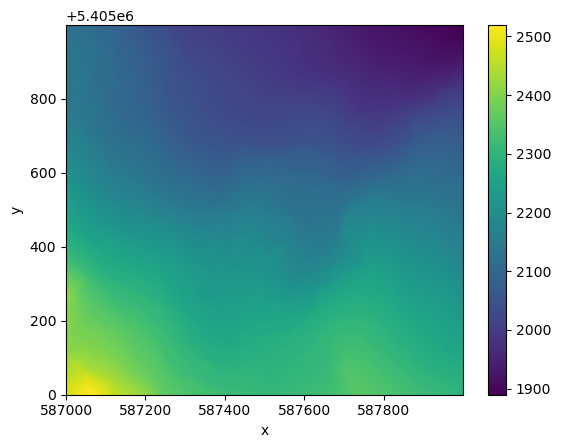

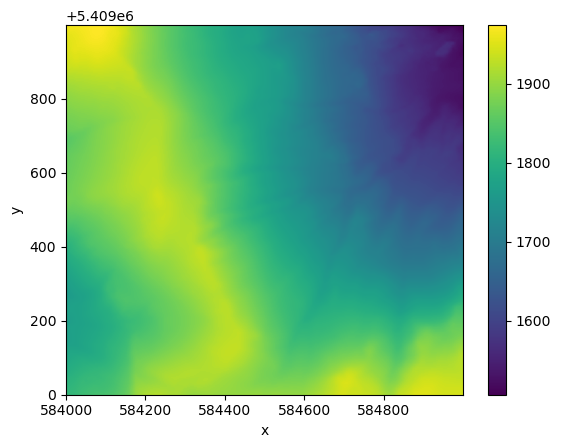

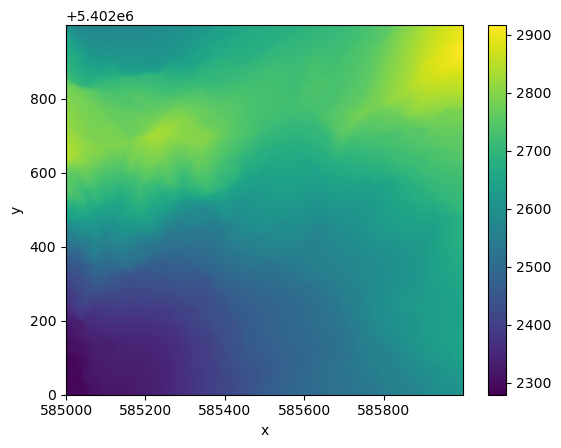

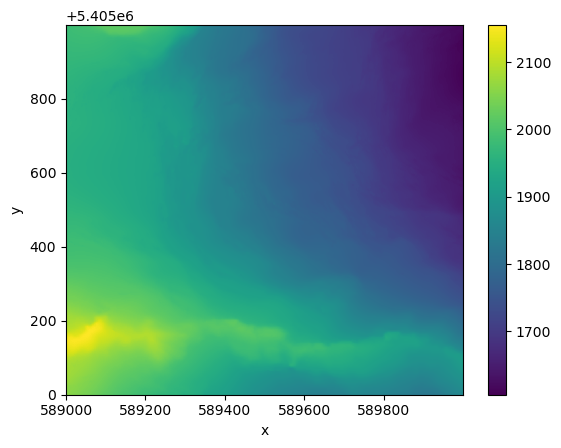

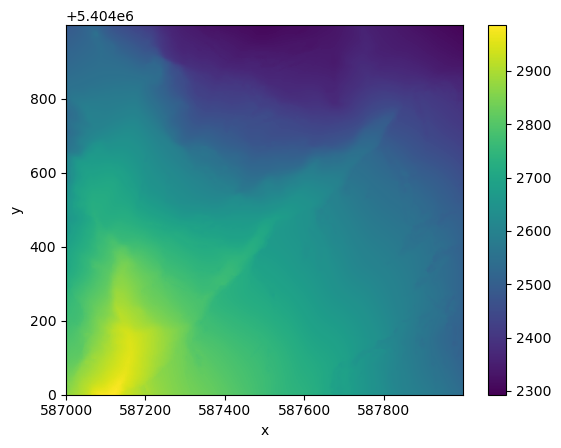

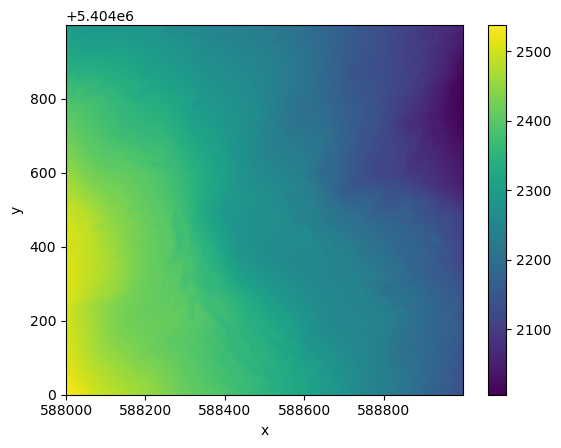

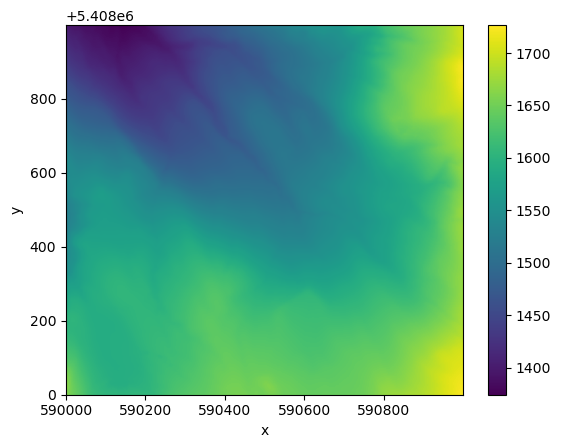

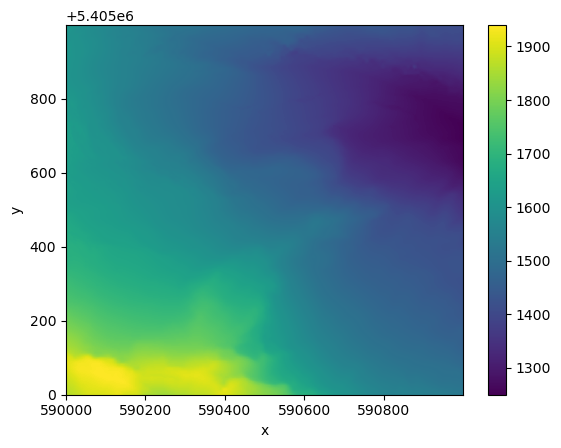

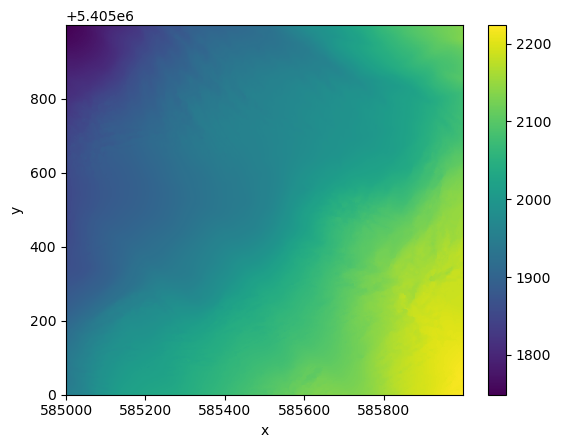

In [78]:
for d in train_dirs[:3]: # they all plot successfully
    fn=os.path.join(d,"WV01_20150911_1020010042D39D00_1020010043455300_aligned_crop_1.0m-DEM_holes_filled_snow_median_subtracted.tif")
    subtracted = rioxarray.open_rasterio(fn)
    plt.figure()
    subtracted.plot()
    plt.title(os.path.basename(d))

In [9]:
esa_2021_full = rioxarray.open_rasterio("/mnt/1.0_TB_VOLUME/sethv/resdepth_all/data/torchgeo_experiments/rasters/ESA_WorldCover_10m_2021_v200_N48W123_Map.tif")
snow_pixel_counts = dict()

In [3]:
import tqdm

### Change or remove `n_plots` to process all

There are 128 files in the whole train+val mosaic, creating new melt-adjusted copies...


100%|██████████████████████████████████████████████████████████| 9/9 [00:04<00:00,  1.89it/s]


Saved modified versions of 9 tiles


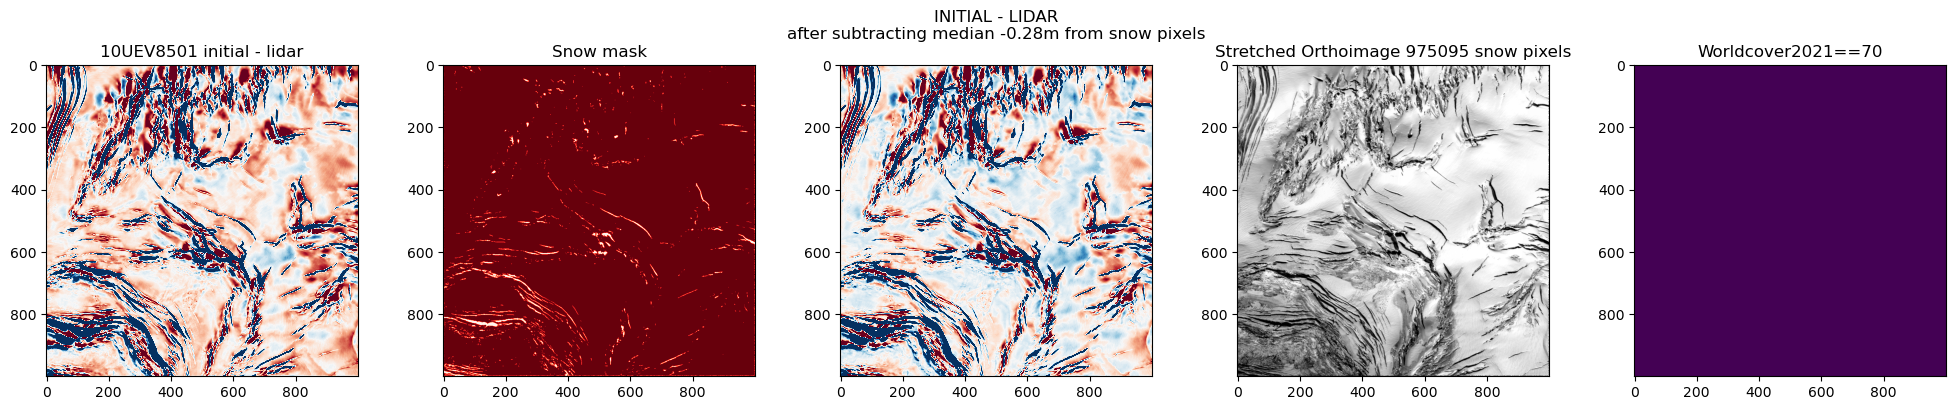

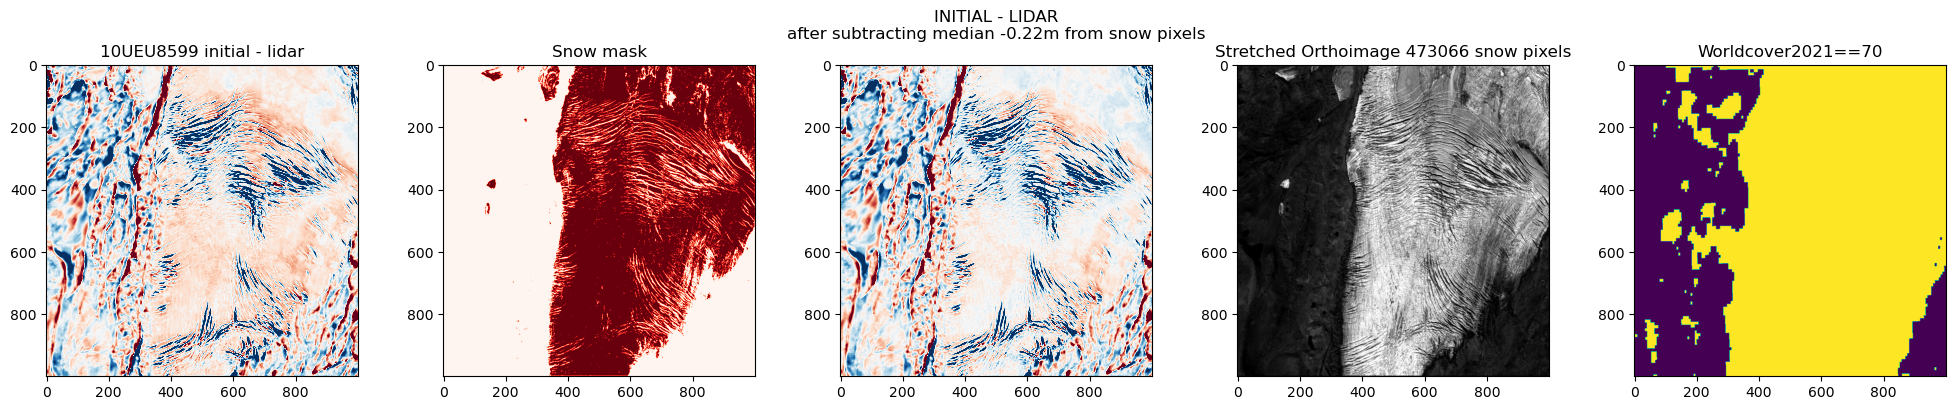

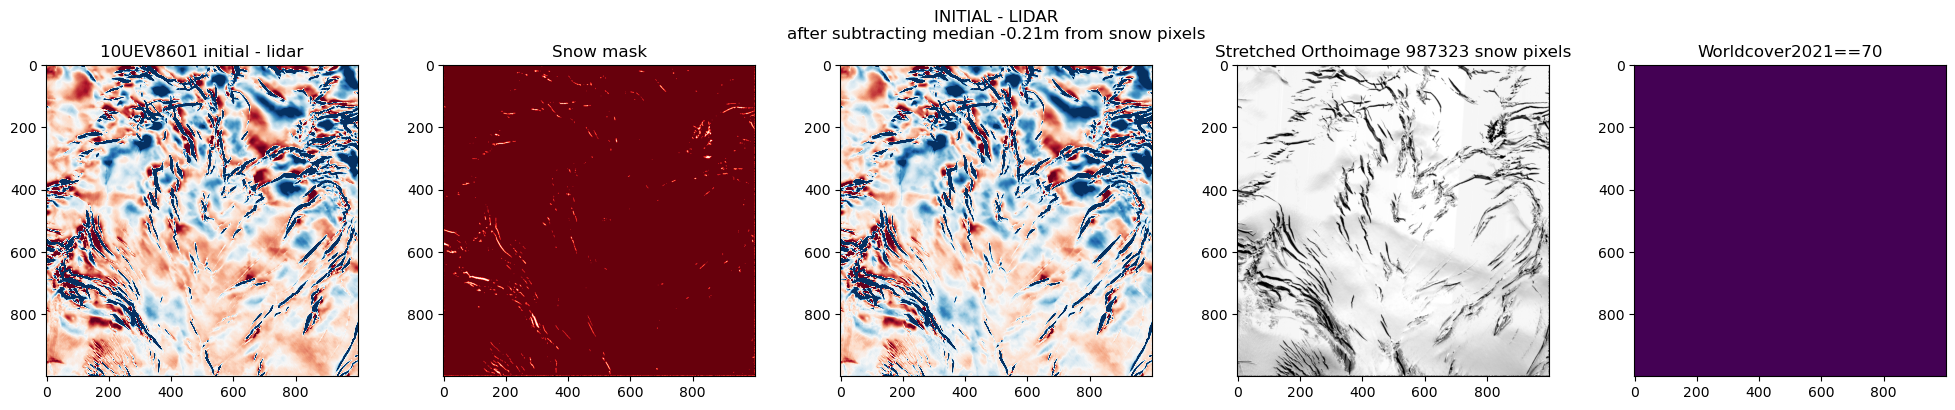

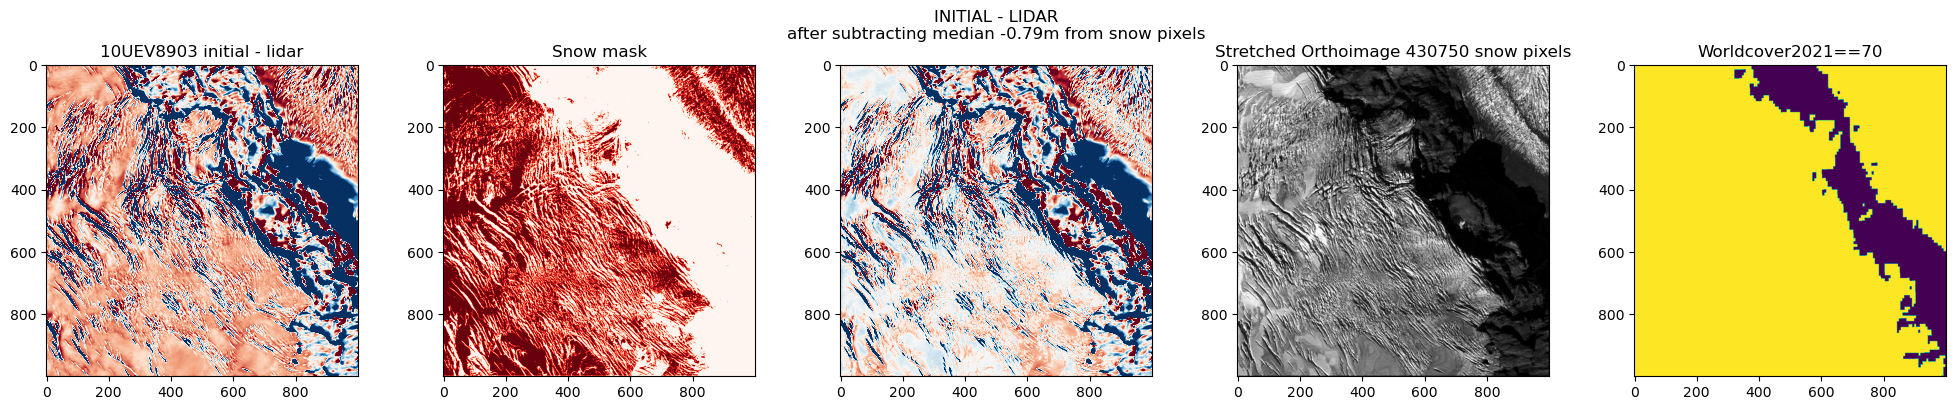

In [15]:
# train_dirs = list(glob.glob(f"/mnt/1.0_TB_VOLUME/sethv/shashank_data/TRAIN_tile_stack_baker_128_global_coreg/pc_laz_prep_full_outputs_USGS_LPC_WA_MtBaker_2015_*_LAS_2017/lower_easton3/files_to_zip/"))
train_dirs = list(glob.glob(f"/mnt/1.0_TB_VOLUME/sethv/resdepth_all/data/shashank_data/TRAIN_tile_stack_baker_small_errors_only/pc_laz_prep_full_outputs_USGS_LPC_WA_MtBaker_2015_*_LAS_2017/lower_easton3/files_to_zip/"))
val_dirs = list(glob.glob(f"/mnt/1.0_TB_VOLUME/sethv/resdepth_all/data/shashank_data/VAL_tile_stack_baker_small_errors_only/pc_laz_prep_full_outputs_USGS_LPC_WA_MtBaker_2015_*_LAS_2017/lower_easton3/files_to_zip/"))

mosaic_dirs = list(glob.glob(f"/mnt/1.0_TB_VOLUME/sethv/resdepth_all/data/shashank_data/*_tile_stack_baker_128_global_coreg/pc_laz_prep_full_outputs_USGS_LPC_WA_MtBaker_2015_*_LAS_2017/lower_easton3/files_to_zip/"))
print(f"There are {len(mosaic_dirs)} files in the whole train+val mosaic, creating new melt-adjusted copies...")
# assert 0
n_plots = 9
show_plots = True
for train_dir in tqdm.tqdm(mosaic_dirs[:n_plots]): #val_dirs:# train_dirs[:n_plots]:
    m = re.search("USGS_LPC_WA_MtBaker_2015_(.*)_LAS_2017", train_dir)
    usgs_id = m.groups(0)[0]
    initial_dem = rioxarray.open_rasterio(os.path.join(train_dir, initial_dem_root)).squeeze()
    target_dem = rioxarray.open_rasterio(list(glob.glob(os.path.join(train_dir, target_root)))[0]).squeeze()
    diff = initial_dem - target_dem

    # plt.colorbar(im)
    # print(snow_mask)
    # print(int(snow_mask.sum()))
    # break
    
    esa_2021 = esa_2021_full.rio.reproject_match(initial_dem)
    
    ortho_left = rioxarray.open_rasterio(os.path.join(train_dir, ortho_left_root)).squeeze()

    # plt.figure()
    # plt.imshow(ortho_left, cmap="gray")
    # plt.figure()
    ortho_left_padded = np.zeros((initial_dem.shape[0],initial_dem.shape[1]), dtype=np.uint16)
    ortho_left_padded[1:,1:] = ortho_left
    # Try coarsening the image to deal with crevasses
    kernel = np.ones((15,15), np.uint8)
    blurry = cv.erode(ortho_left_padded, kernel, 1)
    blurry = cv.dilate(blurry, kernel, 1)
    
    snow_mask = (ortho_left_padded > 500)
    # snow_mask = (ortho_left_padded > 300) * (esa_2021.squeeze() == 70) #(blurry > 400) # 200 with 15x15 kernel, erosion, dilation could work if ONLY known snow/ice land cover class is modified
    num_snow_pixels = int(snow_mask.sum())
    mean_diff_snow = diff.where(snow_mask).mean()
    median_diff_snow = float(diff.where(snow_mask).median())
    # print(median_diff_snow)
    
    num_total_pixels = initial_dem.shape[0] * initial_dem.shape[1]
    
    snow_pixel_counts[usgs_id] = {"num_snow_pixels": num_snow_pixels,
                                  "median_diff_snow": median_diff_snow,
                                 "mean_diff_snow": mean_diff_snow}
    threshold = 0.05 # proportion of pixels needed to consider this a snow/ice tile
    if num_snow_pixels < threshold*num_total_pixels:
        continue

    initial_dem_modified = initial_dem - median_diff_snow * snow_mask
    initial_dem_fn = os.path.join(train_dir, initial_dem_root)
    initial_dem_modified_fn = initial_dem_fn.replace(".tif","_snow_median_subtracted.tif")
    # initial_dem_modified.rio.to_raster(initial_dem_modified_fn, dtype="float32", masked=True)
    # print(f"Saved modified DEM to {initial_dem_modified_fn}")

    diff_modified = initial_dem_modified - target_dem
    if not show_plots:
        continue
    
    fig, ax = plt.subplots(1,5, figsize=(20,4), dpi=100)
    im = ax[0].imshow(diff, cmap="RdBu", vmin=-2,vmax=2)
    ax[0].set_title(f"{usgs_id} initial - lidar")
    
    im = ax[2].imshow(diff_modified, cmap="RdBu", vmin=-2,vmax=2)
    modified_title = f"""INITIAL - LIDAR\nafter subtracting median {median_diff_snow:.2f}m from snow pixels
    """
    ax[2].set_title(modified_title)
    # plt.colorbar(im)
    plt.tight_layout()
    # ax[1].imshow(diff.where(snow_mask),vmin=-2,vmax=2, cmap="RdBu", rasterized=True)
    # title = f"""
    # Median difference over snow: {median_diff_snow:.2f}m
    # """
    # ax[1].set_title(title)

    from skimage import exposure
    import numpy as np
    p2, p98 = np.percentile(ortho_left, (2, 98))
    ortho_left_rescale = exposure.rescale_intensity(ortho_left, in_range=(p2, p98))
    ax[3].imshow(ortho_left_rescale, cmap="gray")
    # ax[3].colorbar()
    ax[3].set_title(f"Stretched Orthoimage {num_snow_pixels} snow pixels")
    
    ax[1].imshow(snow_mask, cmap="Reds")
    ax[1].set_title("Snow mask")

    ax[4].imshow(esa_2021.squeeze() == 70)
    ax[4].set_title("Worldcover2021==70")

print(f"Saved modified versions of {n_plots} tiles")

In [82]:
subtracted.dtype

dtype('float64')

In [68]:
snow_pixel_counts

{'10UEU8699': {'num_snow_pixels': 276641,
  'median_diff_snow': -0.296875,
  'mean_diff_snow': <xarray.DataArray ()>
  array(-0.24486005, dtype=float32)
  Coordinates:
      band         int64 1
      spatial_ref  int64 0},
 '10UEV8803': {'num_snow_pixels': 844102,
  'median_diff_snow': -0.4169921875,
  'mean_diff_snow': <xarray.DataArray ()>
  array(-0.30956364, dtype=float32)
  Coordinates:
      band         int64 1
      spatial_ref  int64 0},
 '10UEV8507': {'num_snow_pixels': 1146,
  'median_diff_snow': 0.046875,
  'mean_diff_snow': <xarray.DataArray ()>
  array(0.0720316, dtype=float32)
  Coordinates:
      band         int64 1
      spatial_ref  int64 0},
 '10UEV9003': {'num_snow_pixels': 94725,
  'median_diff_snow': -0.8046875,
  'mean_diff_snow': <xarray.DataArray ()>
  array(-0.7835885, dtype=float32)
  Coordinates:
      band         int64 1
      spatial_ref  int64 0},
 '10UEU8798': {'num_snow_pixels': 670,
  'median_diff_snow': -0.69482421875,
  'mean_diff_snow': <xarray.D

In [66]:
!find "/mnt/1.0_TB_VOLUME/sethv/shashank_data/TRAIN_tile_stack_baker_small_errors_only/" -name "*subtracted*" | wc -l

60


In [21]:
snow_pixel_counts

{'10UEU8699': {'num_snow_pixels': 299809,
  'median_diff_snow': -0.2861328125,
  'mean_diff_snow': <xarray.DataArray ()>
  array(-0.22836271, dtype=float32)
  Coordinates:
      band         int64 1
      spatial_ref  int64 0},
 '10UEV8803': {'num_snow_pixels': 874272,
  'median_diff_snow': -0.40234375,
  'mean_diff_snow': <xarray.DataArray ()>
  array(-0.20815967, dtype=float32)
  Coordinates:
      band         int64 1
      spatial_ref  int64 0}}

## 10UEV8800 example of the approach

In [5]:
root_dir = f"/mnt/1.0_TB_VOLUME/sethv/shashank_data/TRAIN_tile_stack_baker_128_global_coreg/pc_laz_prep_full_outputs_USGS_LPC_WA_MtBaker_2015_10UEV8800_LAS_2017/lower_easton3/files_to_zip/"

ortho_left_root = "1020010042D39D00.r100_ortho_1.0m_ba.tif"
ortho_right_root = "1020010043455300.r100_ortho_1.0m_ba.tif"
initial_dem_root = "WV01_20150911_1020010042D39D00_1020010043455300_aligned_crop_1.0m-DEM_holes_filled.tif"
initial_dem_unfilled_root = (
    "WV01_20150911_1020010042D39D00_1020010043455300_aligned_crop_1.0m-DEM.tif"
)
target_root = "USGS_LPC_WA_MtBaker_2015_*_LAS_2017_32610_first_filt_v1.3_1.0m-DEM_holes_filled.tif"
triangulation_error_root = "WV01_20150911_1020010042D39D00_1020010043455300_aligned_crop_1.0m-IntersectionErr.tif"

In [10]:
initial_dem = rioxarray.open_rasterio(os.path.join(root_dir, initial_dem_root)).squeeze()
target_dem = rioxarray.open_rasterio(list(glob.glob(os.path.join(root_dir, target_root)))[0]).squeeze()
diff = initial_dem - target_dem

In [11]:
minx, miny, maxx, maxy = initial_dem.rio.bounds()
center_x = int(round((minx+maxx) / 2, 0))
center_y = int(round((miny+maxy) / 2, 0))
print(f"Center in CRS '{initial_dem.rio.crs}': {center_x}, {center_y}")

Center in CRS 'EPSG:32610': 588500, 5400500


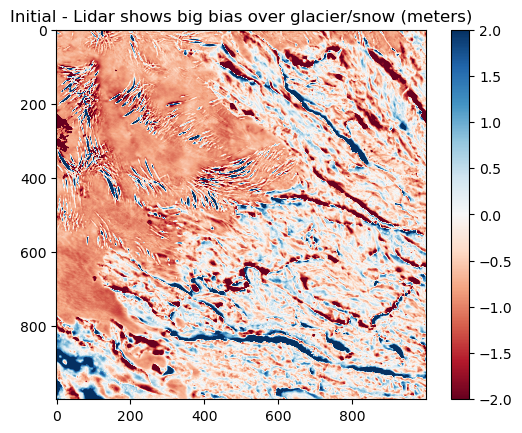

In [12]:
plt.imshow(diff, cmap="RdBu", vmin=-2,vmax=2)
plt.title("Initial - Lidar shows big bias over glacier/snow (meters)")
plt.colorbar()

In [14]:
ortho_left = rioxarray.open_rasterio(os.path.join(root_dir, ortho_left_root)).squeeze()

Text(0.5, 1.0, 'Orthoimage digital number')

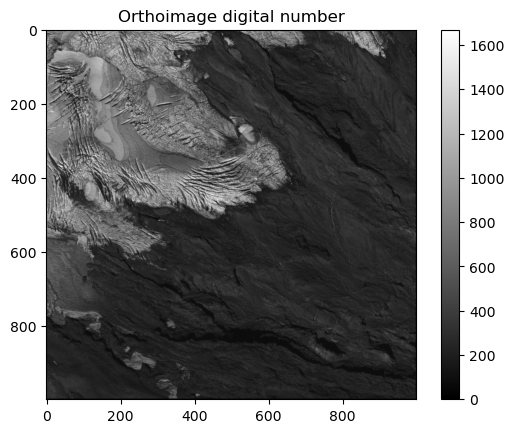

In [15]:
plt.imshow(ortho_left, cmap="gray")
plt.colorbar()
plt.title("Orthoimage digital number")

Text(0.5, 1.0, 'Orthoimage digital number = crude snow mask')

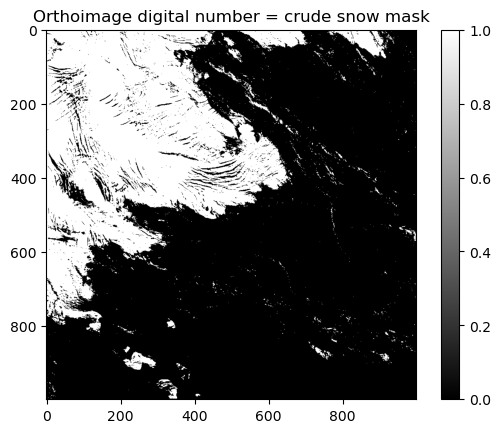

In [16]:
plt.imshow(ortho_left > 400, cmap="gray")
plt.colorbar()
plt.title("Orthoimage digital number = crude snow mask")

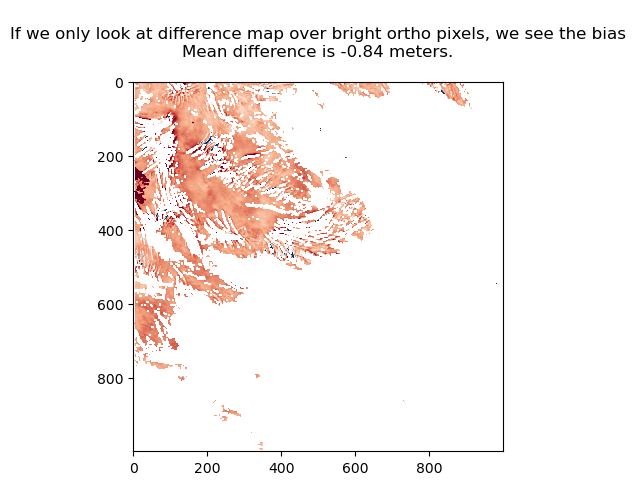

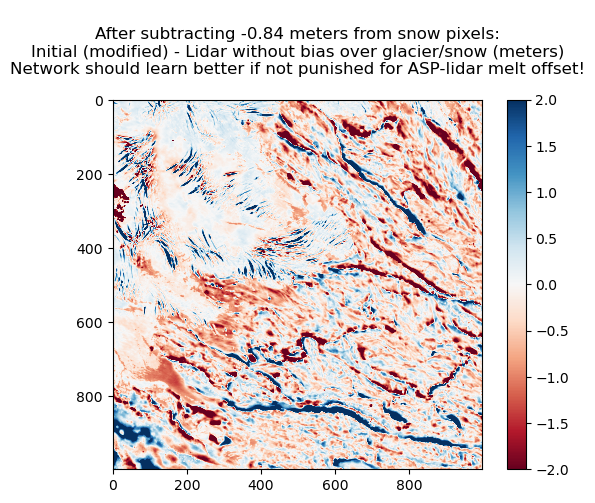

In [17]:
mean_diff_snow = diff.where(ortho_left > 400).mean()

plt.imshow(diff.where(ortho_left > 400),vmin=-2,vmax=2, cmap="RdBu", rasterized=True)
title = f"""
If we only look at difference map over bright ortho pixels, we see the bias
Mean difference is {mean_diff_snow:.2f} meters.
"""
plt.title(title)

plt.figure()
initial_dem_modified = initial_dem - (ortho_left > 400) *  mean_diff_snow

diff_modified = initial_dem_modified - target_dem
plt.imshow(diff_modified, cmap="RdBu", vmin=-2,vmax=2)
modified_title = f"""
After subtracting {mean_diff_snow:.2f} meters from snow pixels:
Initial (modified) - Lidar without bias over glacier/snow (meters)
Network should learn better if not punished for ASP-lidar melt offset!
"""
plt.title(modified_title)
plt.colorbar()

## Next step: Adjust entire raster based on the approach here with 1 tile at a time
* Can just compute for each 1km block & subtract as a first pass